# Climate Change

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?
* Null hypothesis: There is no correlation between a country’s yearly average CO2 level
* Alternative hypothesis: As CO2 levels increase, a population’s life expectancy decreases.
* Data: https://data.worldbank.org/indicator/SP.DYN.LE00.IN


In [2]:
# Read Life Expectancy data from csv file 
lf_df = pd.read_csv("data_sets/Lifeexpectancy.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    lf_df=lf_df.drop(columns=[f"{x}"])
lf_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.429,74.576,74.725,74.872,75.017,75.158,75.299,75.441,75.583,75.725
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,58.826,59.375,59.930,60.484,61.028,61.553,62.054,62.525,62.966,63.377
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,51.143,52.177,53.243,54.311,55.350,56.330,57.236,58.054,58.776,59.398
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read CO2 data from csv file 
co2_df = pd.read_csv("data_sets/CO2emission_percapita.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    co2_df=co2_df.drop(columns=[f"{x}"])

# Preview CO2 emission dataframe
co2_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203958,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786


In [4]:
# Merge life expectancy and CO2 dataframes with the key "Country Name"
co2_lf_df=lf_df.merge(co2_df,how="inner",on="Country Name", suffixes=('_lf', '_co2'))

In [5]:
# Preview data
co2_lf_df.head()

,Country Name,Country Code_lf,Indicator Name_lf,Indicator Code_lf,1960_lf,1961_lf,1962_lf,1963_lf,1964_lf,1965_lf,...,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,2015_co2
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786


In [6]:
# Clean NAN value from merged dataframe 
co2_lf_df.dropna(inplace=True)

# Clean druplicated coutnry from merged dataframe 
co2_lf_df.drop_duplicates(subset=['Country Name'],inplace=True)

# Clean negative value
for y in range(1960,2016):
    co2_lf_df=co2_lf_df[co2_lf_df[f"{y}_co2"]>=0]
    co2_lf_df=co2_lf_df[co2_lf_df[f"{y}_lf"]>=0]

co2_lf_df.reset_index(drop=True)

,Country Name,Country Code_lf,Indicator Name_lf,Indicator Code_lf,1960_lf,1961_lf,1962_lf,1963_lf,1964_lf,1965_lf,...,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,2015_co2
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,4.287323,4.118447,4.408396,4.562925,4.630645,4.572407,4.956928,4.801390,4.981330,4.933420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Vietnam,VNM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,59.039000,59.720000,60.387000,61.020000,61.581000,61.963000,...,1.214193,1.227734,1.368182,1.476951,1.622619,1.712241,1.588282,1.622308,1.824532,2.032108
182,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.578367,53.079543,53.496798,54.022024,54.691923,55.351110,...,0.004628,0.004650,0.004754,0.004572,0.004832,0.004932,0.004983,0.004986,0.004941,0.004902
183,Samoa,WSM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,56.902000,57.188000,57.472000,57.756000,58.045000,58.340000,...,0.912310,0.946733,0.980465,1.013335,1.005744,1.075831,1.047227,1.038282,1.087389,1.212776
184,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,1.030386,0.985390,1.020428,1.090990,1.011975,0.865783,0.764021,1.013754,0.955251,0.497091


In [15]:
# Transfer "Country Name" column to a list of country
country=co2_lf_df["Country Name"].tolist()
#print(country)

In [8]:
# Create two dictionaries of CO2 and Life expectancy.
# Keys are country names and values are list of CO2/Life expectancy data
co2_dict={}
lf_dict={}

In [9]:
# Loop every country in the country list
for x in country:
    # Add the key (coutry) to the dictionary
    co2_dict[x]=[]
    lf_dict[x]=[]
    # Loop every year from 1960 to 2015
    for y in range(1960,2016):
        # Add the value to the correponding country.
        co2_dict[x].append(co2_lf_df[f"{y}_co2"][co2_lf_df["Country Name"]==x].values[0])
        lf_dict[x].append(co2_lf_df[f"{y}_lf"][co2_lf_df["Country Name"]==x].values[0])

## Global CO2 vs Life expectancy

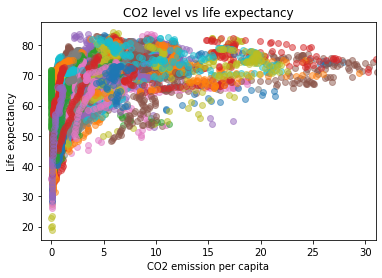

In [10]:
# Combine all the co2/life expectancy data together for curve fitting
co2=[]
lf=[]
# Loop every coutnry in the country list
for x in country:
    for y in co2_dict[x]:
        co2.append(y)
    for y in lf_dict[x]:
        lf.append(y)
    # Plot the CO2/Life expectancy data of each country
    plt.scatter(co2_dict[x], lf_dict[x], alpha=0.5)

#plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')

# Set up the figure
plt.xlim(-1,31)
plt.xlabel("CO2 emission per capita")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\Global_CO2_vs_LifeExpectancy.png")
plt.show()

* Globally, life expectancy increases as CO2 emission per capita increase.
* The relationship between life expectancy and CO2 is exponential

0.003079225


C:\Users\Heesu Ha\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


The r squared value is 0.592


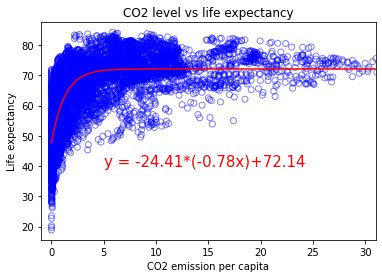

In [11]:
# Define the function we will use for curve fitting.
def func(x, a, b, c):
    return a * np.exp(-b *x) + c

print(min(co2))
# Curve fitting the data
popt, pcov = curve_fit(func, co2, lf)
x_values= np.arange(0.0, 50.0, 0.1)
y_values = [func(x, *popt) for x in x_values]

line_eq = "y = " + str(round(popt[0],2)) + "*(" + str(round(-popt[1],2))+"x)+"+str(round(popt[2],2))
#print(min(co2))
residuals=[]
for i in range(len(co2)):
    residuals.append(lf[i]- func(co2[i], popt[0],popt[1],popt[2]))
ss_res=0.0
for i in range(len(co2)):
    ss_res += residuals[i]**2
    ss_tot = np.sum((lf-np.mean(lf))**2)
r_squared = 1 - (ss_res / ss_tot)
#perr = np.sqrt(np.diag(pcov))
print(f"The r squared value is {round(r_squared, 3)}")

plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')
plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.xlim(-1,31)
plt.xlabel("CO2 emission per capita")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")

plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\Curve_fitting_Global_CO2_vs_LifeExpectancy.png")
plt.show()

* The R squared value of the proposed predicing model is about 0.59.
* This means that the relationship between CO2 and life expectancy may be not that close as we expected.

# Average CO2 emission vs average Life expectancy

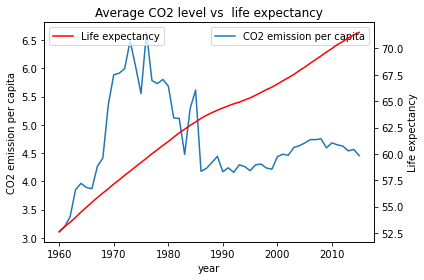

In [12]:
co2_lf_sum=co2_lf_df.describe()
co2_mean=[]
lf_mean=[]
# Create year list
year=[x for x in range(1960,2016)]
for y in year:
    co2_mean.append(co2_lf_sum.iloc[1][f"{y}_co2"])
    lf_mean.append(co2_lf_sum.iloc[1][f"{y}_lf"])

fig, ax1 = plt.subplots()

# Plot average CO2 emission
ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
ax1.plot(year,co2_mean,label="CO2 emission per capita")
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="best")

# Plot average life expectancy
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
ax2.plot(year, lf_mean,color="r",label="Life expectancy")
ax2.tick_params(axis='y')

ax2.legend(loc="best")
plt.title("Average CO2 level vs  life expectancy")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\Global_CO2_vs_LifeExpectancy_average_value.png")
plt.show()

* The average values of CO2/life expectancy show that no obvious correlation is found.
* The relationship between CO2 and life expectancy should be examined regionally.

# Effect of CO2 emission on Life expectancy in different countries

### Developed countries

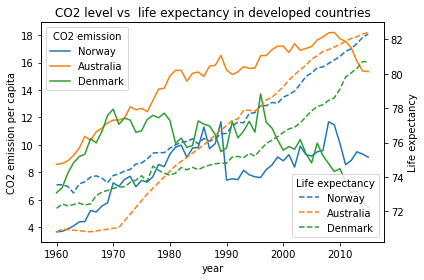

In [13]:
# Developed countries list
Developed_Country=["Norway","Australia","Denmark"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
# plot co2 emission in developed countries
for x in Developed_Country:
    ax1.plot(year,co2_dict[x])
ax1.tick_params(axis='y')
ax1.legend(Developed_Country,title='CO2 emission',loc='upper left')

# plot life expectancy in developed countries
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developed_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed')
ax2.tick_params(axis='y')
ax2.legend(Developed_Country, title='Life expectancy',loc="lower right")

plt.title("CO2 level vs  life expectancy in developed countries")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\CO2_vs_LifeExpectancy_developed_countries.png")
plt.show()

* The CO2 emissions in developed coutries are higher.
* CO2 emission change has little effect on life expectancy.

### Developing countries

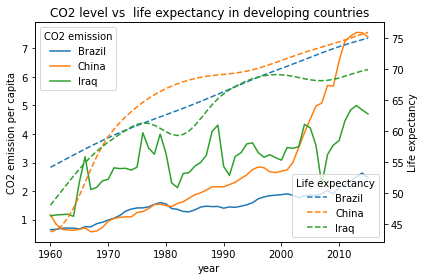

In [14]:
Developing_Country=["Brazil","China","Iraq"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
# plot co2 emission in developing countries
for x in Developing_Country:
    ax1.plot(year,co2_dict[x])
    
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(Developing_Country,title='CO2 emission',loc='upper left')

# plot life expectancy in developing countries
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developing_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed',)
ax2.tick_params(axis='y')
ax2.legend(Developing_Country, title='Life expectancy',loc="lower right")

plt.title("CO2 level vs  life expectancy in developing countries")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\CO2_vs_LifeExpectancy_developing_countries.png")
plt.show()

* The CO2 emissions in developing coutries are lower.
* Life expectancy increases as CO2 emission increases in developing countries.